   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

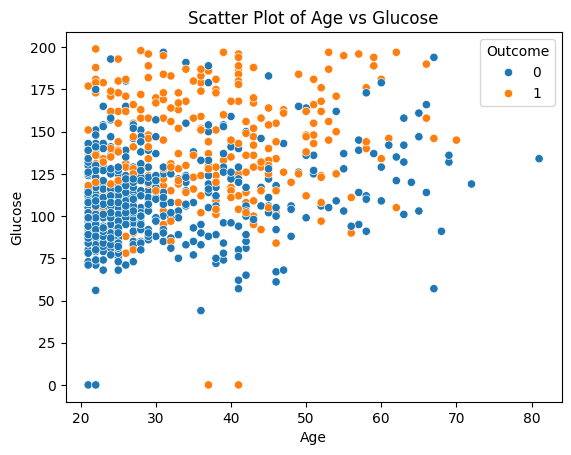

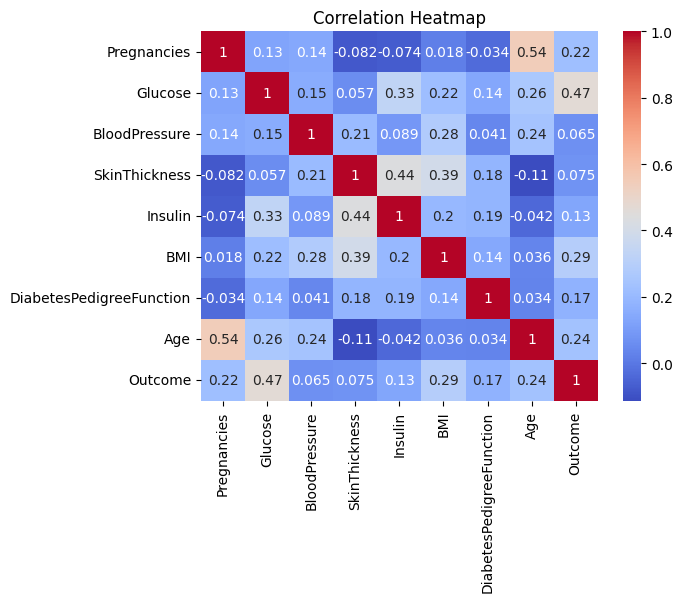

Logistic Regression Accuracy: 0.7359307359307359
LDA Accuracy: 0.7316017316017316
Confusion Matrix (Logistic Regression):
 [[120  31]
 [ 30  50]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('diabetes.csv')  # Replace with your file path

# Data overview
print(data.head())
print(data.info())

# Data visualization: Scatter plot and heatmap
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=data)
plt.title('Scatter Plot of Age vs Glucose')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Splitting data
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# LDA Model
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))